데이터 로드 중...
학습 데이터 크기: (87159, 16)
테스트 데이터 크기: (46204, 15)
제출 샘플 크기: (46204, 2)

학습 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87159 entries, 0 to 87158
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 87159 non-null  object 
 1   Age                87159 non-null  int64  
 2   Gender             87159 non-null  object 
 3   Country            87159 non-null  object 
 4   Race               87159 non-null  object 
 5   Family_Background  87159 non-null  object 
 6   Radiation_History  87159 non-null  object 
 7   Iodine_Deficiency  87159 non-null  object 
 8   Smoke              87159 non-null  object 
 9   Weight_Risk        87159 non-null  object 
 10  Diabetes           87159 non-null  object 
 11  Nodule_Size        87159 non-null  float64
 12  TSH_Result         87159 non-null  float64
 13  T4_Result          87159 non-null  float64
 14  T3_Result          87159 n

,Description,Value
0,Session id,42
1,Target,Cancer
2,Target type,Binary
3,Original data shape,"(69727, 16)"
4,Transformed data shape,"(106821, 29)"
5,Transformed train set shape,"(85902, 29)"
6,Transformed test set shape,"(20919, 29)"
7,Numeric features,6
8,Categorical features,9
9,Preprocess,True



모든 모델 학습 및 비교 중...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8843,0.7054,0.4292,0.5216,0.4708,0.4066,0.4091,0.8200
gbc,Gradient Boosting Classifier,0.8840,0.7033,0.4287,0.5201,0.4700,0.4056,0.4080,2.7620
rf,Random Forest Classifier,0.8817,0.7008,0.3505,0.5101,0.4155,0.3522,0.3599,1.2800
catboost,CatBoost Classifier,0.8834,0.7030,0.3454,0.5208,0.4153,0.3535,0.3627,3.3960
et,Extra Trees Classifier,0.8790,0.6962,0.3439,0.4939,0.4054,0.3404,0.3474,1.0480
lda,Linear Discriminant Analysis,0.8536,0.6882,0.3893,0.3900,0.3895,0.3064,0.3064,0.2540
ridge,Ridge Classifier,0.8187,0.6866,0.4458,0.3178,0.3711,0.2686,0.2738,0.2340
ada,Ada Boost Classifier,0.8565,0.6842,0.3425,0.3950,0.3640,0.2841,0.2864,0.7860
nb,Naive Bayes,0.8135,0.6829,0.4007,0.2959,0.3403,0.2346,0.2383,0.2360
lr,Logistic Regression,0.7486,0.6834,0.5242,0.2447,0.3335,0.2031,0.2256,0.8160



최고 성능 모델: LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

최고 모델 분석 중...


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


최고 모델 하이퍼파라미터 튜닝 중...


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8855,0.6983,0.4637,0.5257,0.4927,0.4285,0.4295
1,0.8819,0.6953,0.4548,0.5091,0.4804,0.4140,0.4148
2,0.8811,0.6900,0.4275,0.5055,0.4632,0.3969,0.3987
3,0.8872,0.7098,0.4936,0.5322,0.5122,0.4485,0.4489
4,0.8867,0.7234,0.4808,0.5306,0.5045,0.4407,0.4414
Mean,0.8845,0.7034,0.4641,0.5206,0.4906,0.4257,0.4267
Std,0.0025,0.0119,0.0227,0.0111,0.0174,0.0185,0.0181


Fitting 5 folds for each of 10 candidates, totalling 50 fits

튜닝된 모델 평가 중...


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…


모델 해석 중...


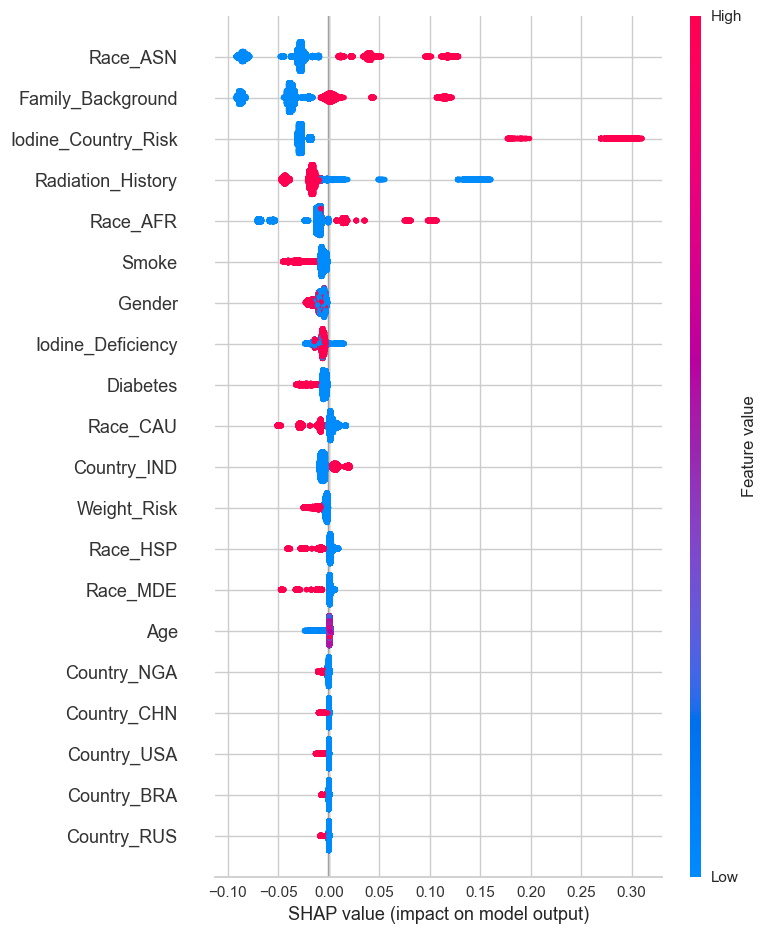


최적 모델 정보 저장 중...
최적 모델 유형: LGBMClassifier
사용 가능한 모델 목록 확인:
사용 가능한 모델 수: 18
PyCaret 모델 이름으로 변환: LGBMClassifier -> lightgbm
최적 하이퍼파라미터 저장 완료

최종 모델을 위해 전체 학습 데이터로 새 PyCaret 세션 설정 중...


,Description,Value
0,Session id,42
1,Target,Cancer
2,Target type,Binary
3,Original data shape,"(87159, 16)"
4,Transformed data shape,"(133528, 29)"
5,Transformed train set shape,"(107380, 29)"
6,Transformed test set shape,"(26148, 29)"
7,Numeric features,6
8,Categorical features,9
9,Preprocess,True



전체 데이터로 최종 모델 생성 중...


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8836,0.7019,0.4259,0.5187,0.4678,0.4031,0.4056
1,0.8856,0.7036,0.4392,0.5279,0.4795,0.4158,0.4181
2,0.8892,0.7216,0.4583,0.5455,0.4981,0.4364,0.4385
3,0.8814,0.6883,0.4208,0.5070,0.4599,0.3939,0.3961
4,0.8794,0.7053,0.4262,0.4968,0.4588,0.3914,0.3928
Mean,0.8838,0.7041,0.4341,0.5192,0.4728,0.4081,0.4102
Std,0.0034,0.0106,0.0136,0.0168,0.0147,0.0165,0.0166


모델 'lightgbm' 생성 성공

전체 데이터로 최종 모델 하이퍼파라미터 튜닝 중...


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8849,0.7012,0.4580,0.5238,0.4887,0.4242,0.4254
1,0.8859,0.6984,0.4638,0.5280,0.4938,0.4298,0.4310
2,0.8900,0.7124,0.4877,0.5467,0.5155,0.4537,0.4547
3,0.8808,0.6923,0.4467,0.5035,0.4734,0.4064,0.4074
4,0.8799,0.7078,0.4665,0.4996,0.4825,0.4147,0.4150
Mean,0.8843,0.7024,0.4646,0.5203,0.4908,0.4258,0.4267
Std,0.0037,0.0070,0.0134,0.0172,0.0141,0.0161,0.0162


Fitting 5 folds for each of 10 candidates, totalling 50 fits

최종 모델 마무리 중...

최종 모델 저장 중...
Transformation Pipeline and Model Successfully Saved

테스트 데이터에 예측 중...


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8

예측 완료! 'pycaret_submission.csv' 파일에 결과가 저장되었습니다.
예측 결과 분포:
Cancer
0    40453
1     5751
Name: count, dtype: int64
암 양성 예측 비율: 12.45%

전체 데이터로 상위 모델 앙상블 시도...
모델 클래스 이름: LGBMClassifier
앙상블용 모델 생성 시도: lightgbm


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8836,0.7019,0.4259,0.5187,0.4678,0.4031,0.4056
1,0.8856,0.7036,0.4392,0.5279,0.4795,0.4158,0.4181
2,0.8892,0.7216,0.4583,0.5455,0.4981,0.4364,0.4385
3,0.8814,0.6883,0.4208,0.5070,0.4599,0.3939,0.3961
4,0.8794,0.7053,0.4262,0.4968,0.4588,0.3914,0.3928
Mean,0.8838,0.7041,0.4341,0.5192,0.4728,0.4081,0.4102
Std,0.0034,0.0106,0.0136,0.0168,0.0147,0.0165,0.0166


앙상블용 모델 생성 성공: lightgbm
모델 클래스 이름: GradientBoostingClassifier
앙상블용 모델 생성 시도: gbc


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8849,0.6974,0.4184,0.5262,0.4662,0.4026,0.4059
1,0.8863,0.7061,0.4317,0.5324,0.4768,0.4138,0.4167
2,0.8903,0.7153,0.4617,0.5509,0.5024,0.4413,0.4435
3,0.8814,0.6902,0.4139,0.5071,0.4558,0.3900,0.3926
4,0.8786,0.7071,0.4221,0.4932,0.4549,0.3871,0.3886
Mean,0.8843,0.7032,0.4296,0.5220,0.4712,0.4070,0.4094
Std,0.0040,0.0086,0.0171,0.0201,0.0175,0.0196,0.0197


앙상블용 모델 생성 성공: gbc
모델 클래스 이름: RandomForestClassifier
앙상블용 모델 생성 시도: rf


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8836,0.6943,0.3611,0.5217,0.4268,0.3644,0.3720
1,0.8859,0.6981,0.3689,0.5357,0.4369,0.3758,0.3839
2,0.8864,0.7177,0.3593,0.5400,0.4315,0.3712,0.3807
3,0.8782,0.6890,0.3395,0.4892,0.4008,0.3355,0.3424
4,0.8780,0.6999,0.3518,0.4882,0.4089,0.3428,0.3486
Mean,0.8824,0.6998,0.3561,0.5150,0.4210,0.3579,0.3655
Std,0.0037,0.0097,0.0099,0.0223,0.0138,0.0159,0.0169


앙상블용 모델 생성 성공: rf


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8839,0.6959,0.4177,0.5204,0.4635,0.3992,0.4023
1,0.8858,0.7038,0.4331,0.5292,0.4763,0.4129,0.4156
2,0.8903,0.7168,0.4583,0.5514,0.5006,0.4395,0.4419
3,0.8813,0.6883,0.4180,0.5066,0.4581,0.3921,0.3944
4,0.8794,0.7052,0.4262,0.4972,0.4590,0.3916,0.3931
Mean,0.8841,0.7020,0.4307,0.5210,0.4715,0.4071,0.4094
Std,0.0037,0.0096,0.0149,0.0188,0.0159,0.0179,0.0181



앙상블 예측 완료! 'ensemble_submission.csv' 파일에 결과가 저장되었습니다.
앙상블 예측 결과 분포:
Cancer
0    40856
1     5348
Name: count, dtype: int64
암 양성 예측 비율: 11.57%

모델별 성능 지표 시각화...


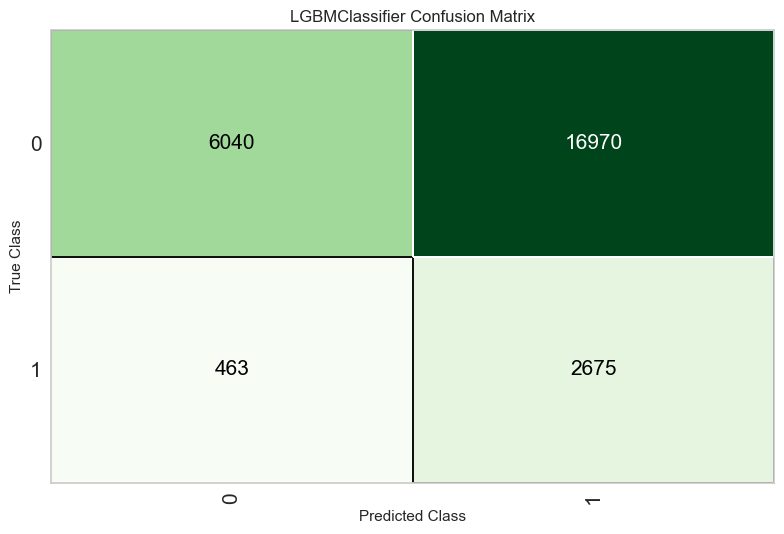

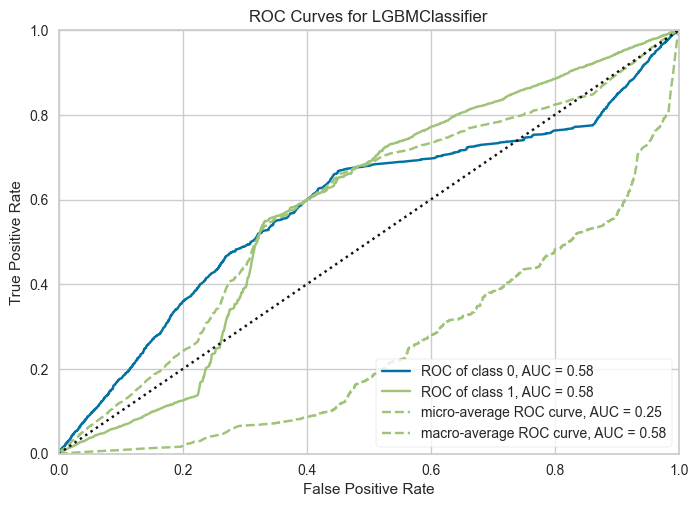

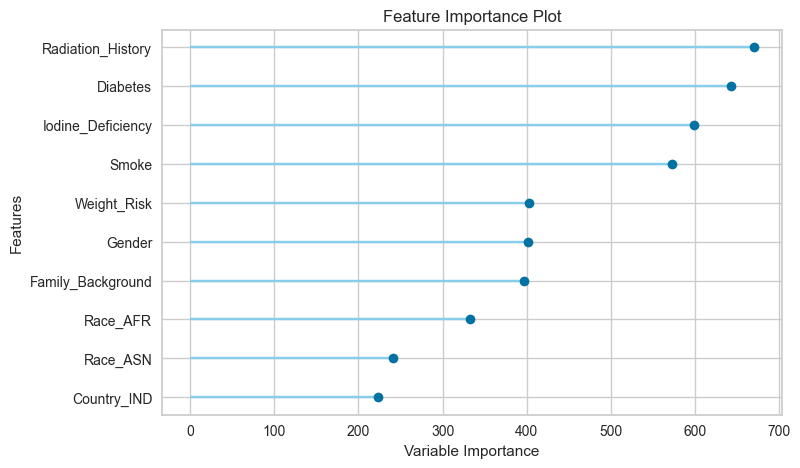


분석 완료!


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# PyCaret 라이브러리 임포트
from pycaret.classification import *

# 데이터 로드
print("데이터 로드 중...")
train_df = pd.read_csv('../train.csv')
test_df = pd.read_csv('../test.csv')
sample_submission = pd.read_csv('../sample_submission.csv')

print(f"학습 데이터 크기: {train_df.shape}")
print(f"테스트 데이터 크기: {test_df.shape}")
print(f"제출 샘플 크기: {sample_submission.shape}")

# 기본적인 데이터 정보 확인
print("\n학습 데이터 정보:")
print(train_df.info())

print("\n결측치 확인:")
print(train_df.isnull().sum())

# 타겟 변수 분포 확인
print("\n타겟 변수(Cancer) 분포:")
print(train_df['Cancer'].value_counts())
print(f"암 양성 비율: {train_df['Cancer'].mean() * 100:.2f}%")

# 1. 데이터 전처리
print("\n데이터 전처리 진행 중...")

# ID 열 drop
train_df_processed = train_df.drop('ID', axis=1)
test_df_processed = test_df.drop('ID', axis=1)

# 범주형(문자열) 변수와 수치형 변수 분리
categorical_cols = train_df_processed.select_dtypes(include=['object']).columns
numerical_cols = train_df_processed.select_dtypes(exclude=['object']).columns.drop('Cancer')

print(f"\n범주형 변수: {list(categorical_cols)}")
print(f"수치형 변수: {list(numerical_cols)}")

# 2. 간단한 특성 엔지니어링
print("\n특성 엔지니어링 진행 중...")

# 아이오딘 결핍과 국가 상호작용 특성 생성
train_df_processed['Iodine_Country_Risk'] = ((train_df_processed['Iodine_Deficiency'] == 'Deficient') & 
                                            (train_df_processed['Country'] == 'IND')).astype(int)
test_df_processed['Iodine_Country_Risk'] = ((test_df_processed['Iodine_Deficiency'] == 'Deficient') & 
                                           (test_df_processed['Country'] == 'IND')).astype(int)

# 수치형 변수의 이상치 클리핑
for col in numerical_cols:
    q1 = train_df_processed[col].quantile(0.01)
    q3 = train_df_processed[col].quantile(0.99)
    train_df_processed[col] = train_df_processed[col].clip(q1, q3)
    test_df_processed[col] = test_df_processed[col].clip(q1, q3)

# StandardScaler 적용
print("\nStandardScaler 적용 중...")
scaler = StandardScaler()
train_df_processed[numerical_cols] = scaler.fit_transform(train_df_processed[numerical_cols])
test_df_processed[numerical_cols] = scaler.transform(test_df_processed[numerical_cols])

# 모델 비교 및 튜닝을 위한 검증용 데이터 분리
# 이 부분은 최적의 모델을 찾기 위한 용도로만 사용
train_data, val_data = train_test_split(train_df_processed, test_size=0.2, random_state=42, stratify=train_df_processed['Cancer'])

print(f"모델 비교용 학습 데이터 크기: {train_data.shape}")
print(f"모델 비교용 검증 데이터 크기: {val_data.shape}")

# 3. PyCaret 설정 및 모델 비교
print("\nPyCaret으로 여러 모델 비교 중...")

# 모델 비교 및 선택을 위한 PyCaret 세션 초기화 (train_data로만)
clf = setup(
    data=train_data,  # 학습 데이터
    target='Cancer',  # 타겟 변수
    numeric_features=list(numerical_cols) + ['Iodine_Country_Risk'],  # 수치형 변수
    categorical_features=list(categorical_cols),  # 범주형 변수
    ignore_features=['ID'] if 'ID' in train_data.columns else [],  # 무시할 변수
    normalize=False,  # 이미 StandardScaler 적용했으므로 False로 설정
    transformation=True,  # 데이터 변환 수행
    fix_imbalance=True,  # 클래스 불균형 처리
    session_id=42,  # 랜덤 시드
    fold=5,  # 5-폴드 교차 검증
    verbose=True  # 세부 정보 출력
)

# 모든 모델 비교 - 기본 설정으로 모든 모델 학습 및 평가
print("\n모든 모델 학습 및 비교 중...")
best_models = compare_models(
    sort='f1',  # F1 점수 기준으로 정렬
    n_select=3,  # 상위 3개 모델 선택
    verbose=True  # 세부 정보 출력
)

# 여러 개의 모델이 있을 경우 첫 번째(가장 좋은) 모델 선택
if isinstance(best_models, list):
    best_model = best_models[0]
else:
    best_model = best_models

# 최고 모델 이름 출력
print(f"\n최고 성능 모델: {best_model}")

# 모델 분석
print("\n최고 모델 분석 중...")

# 학습된 모델 평가
evaluate_model(best_model)

# 하이퍼파라미터 튜닝
print("\n최고 모델 하이퍼파라미터 튜닝 중...")
tuned_model = tune_model(
    best_model,
    optimize='f1',  # F1 점수 최적화
    n_iter=10,  # 10번의 튜닝 반복
    verbose=True  # 세부 정보 출력
)

# 튜닝된 모델 평가
print("\n튜닝된 모델 평가 중...")
evaluate_model(tuned_model)

# 모델 해석
print("\n모델 해석 중...")
try:
    # 기본 해석 방법 사용 (SHAP 없이)
    interpret_model(tuned_model)
except Exception as e:
    print(f"모델 해석 중 오류 발생: {e}")
    print("모델 해석을 건너뛰고 계속 진행합니다.")

# -------------------- 중요 변경 부분 시작 --------------------
# 먼저 최적 모델의 정보 저장
print("\n최적 모델 정보 저장 중...")
best_model_name = type(tuned_model).__name__
print(f"최적 모델 유형: {best_model_name}")

# 기본적으로 제공되는 모델 목록 확인
print("사용 가능한 모델 목록 확인:")
available_models = models()
print(f"사용 가능한 모델 수: {len(available_models)}")

# 모델 이름 매핑 - PyCaret의 내부 이름 형식으로 변환
model_name_mapping = {
    'LGBMClassifier': 'lightgbm',
    'XGBClassifier': 'xgboost',
    'RandomForestClassifier': 'rf',
    'CatBoostClassifier': 'catboost',
    'GradientBoostingClassifier': 'gbc',
    'LogisticRegression': 'lr',
    'DecisionTreeClassifier': 'dt',
    'KNeighborsClassifier': 'knn',
    'AdaBoostClassifier': 'ada'
}

# PyCaret에서 인식하는 모델 이름으로 변환
if best_model_name in model_name_mapping:
    pycaret_model_name = model_name_mapping[best_model_name]
    print(f"PyCaret 모델 이름으로 변환: {best_model_name} -> {pycaret_model_name}")
else:
    # 매핑되지 않은 모델은 기본 이름 사용 (소문자로 변환)
    pycaret_model_name = best_model_name.lower()
    print(f"매핑되지 않은 모델, 기본 이름 사용: {pycaret_model_name}")

# 최적 모델의 하이퍼파라미터 저장 (가능한 경우)
try:
    best_params = tuned_model.get_params()
    print("최적 하이퍼파라미터 저장 완료")
except:
    best_params = {}
    print("하이퍼파라미터를 가져올 수 없습니다. 기본 설정으로 진행합니다.")

# 전체 학습 데이터(train_df_processed)를 사용하여 새로운 PyCaret 세션 설정
print("\n최종 모델을 위해 전체 학습 데이터로 새 PyCaret 세션 설정 중...")
clf_full = setup(
    data=train_df_processed,  # 전체 학습 데이터 (train + validation)
    target='Cancer',  # 타겟 변수
    numeric_features=list(numerical_cols) + ['Iodine_Country_Risk'],
    categorical_features=list(categorical_cols),
    ignore_features=['ID'] if 'ID' in train_df_processed.columns else [],
    normalize=False,
    transformation=True,
    fix_imbalance=True,
    session_id=42,
    fold=5,
    verbose=True
)

# 최종 모델 생성 - 이전에 튜닝된 모델과 동일한 유형의 모델 생성
print("\n전체 데이터로 최종 모델 생성 중...")
try:
    # 먼저 PyCaret 이름으로 시도
    final_model = create_model(pycaret_model_name)
    print(f"모델 '{pycaret_model_name}' 생성 성공")
except ValueError as e:
    print(f"오류 발생: {e}")
    print("다른 모델 생성 시도 중...")
    
    # 실패하면 기본 모델 중 하나 사용
    try:
        # 대체 모델로 Light GBM 시도
        final_model = create_model('lightgbm')
        print("LightGBM 모델 생성 성공")
    except:
        # 그래도 실패하면 Random Forest 시도
        final_model = create_model('rf')
        print("Random Forest 모델 생성 성공")

# 전체 데이터에서 최적 하이퍼파라미터로 모델 튜닝 (저장된 파라미터가 있는 경우)
print("\n전체 데이터로 최종 모델 하이퍼파라미터 튜닝 중...")
# 기본 튜닝 사용 - 저장된 하이퍼파라미터는 사용하지 않음
final_tuned_model = tune_model(
    final_model,
    optimize='f1',
    n_iter=10,
    verbose=True
)
# -------------------- 중요 변경 부분 끝 --------------------

# 최종 모델 마무리
print("\n최종 모델 마무리 중...")
final_model = finalize_model(final_tuned_model)

# 최종 모델 저장
print("\n최종 모델 저장 중...")
save_model(final_model, 'final_cancer_model')

# 테스트 데이터에 예측
print("\n테스트 데이터에 예측 중...")
predictions = predict_model(final_model, data=test_df_processed)

# 예측 결과 추출
test_predictions = predictions['prediction_label'].astype(int)

# sample_submission 파일에 예측 결과 저장
sample_submission['Cancer'] = test_predictions
sample_submission.to_csv('pycaret_submission.csv', index=False)

print("\n예측 완료! 'pycaret_submission.csv' 파일에 결과가 저장되었습니다.")

# 예측 결과 확인
print("예측 결과 분포:")
print(sample_submission['Cancer'].value_counts())
print(f"암 양성 예측 비율: {sample_submission['Cancer'].mean() * 100:.2f}%")

# 상위 3개 모델을 앙상블하여 성능 향상 시도 (전체 데이터 사용)
if isinstance(best_models, list) and len(best_models) > 1:
    print("\n전체 데이터로 상위 모델 앙상블 시도...")
    # 각 모델 타입을 가져와서 전체 데이터로 다시 생성
    ensemble_models = []
    
    # 모델 이름 매핑 - PyCaret의 내부 이름 형식으로 변환
    model_name_mapping = {
        'LGBMClassifier': 'lightgbm',
        'XGBClassifier': 'xgboost',
        'RandomForestClassifier': 'rf',
        'CatBoostClassifier': 'catboost',
        'GradientBoostingClassifier': 'gbc',
        'LogisticRegression': 'lr',
        'DecisionTreeClassifier': 'dt',
        'KNeighborsClassifier': 'knn',
        'AdaBoostClassifier': 'ada'
    }
    
    for model in best_models:
        model_class_name = type(model).__name__
        print(f"모델 클래스 이름: {model_class_name}")
        
        # PyCaret에서 인식하는 모델 이름으로 변환
        if model_class_name in model_name_mapping:
            pycaret_model_name = model_name_mapping[model_class_name]
        else:
            pycaret_model_name = model_class_name.lower()
            
        print(f"앙상블용 모델 생성 시도: {pycaret_model_name}")
        
        try:
            new_model = create_model(pycaret_model_name)
            ensemble_models.append(new_model)
            print(f"앙상블용 모델 생성 성공: {pycaret_model_name}")
        except Exception as e:
            print(f"앙상블용 모델 생성 실패: {e}")
            # 실패 시 기본 모델 추가
            try:
                default_model = create_model('lightgbm')
                ensemble_models.append(default_model)
                print("대체 모델(lightgbm) 추가")
            except:
                print("lightgbm 모델 추가 실패, 앙상블에서 이 모델 제외")
    
    # 모델이 최소 2개 이상 있을 때만 앙상블 진행
    if len(ensemble_models) >= 2:
        # 앙상블 모델 생성
        ensemble_model = blend_models(ensemble_models, optimize='f1')
        
        # 앙상블 모델로 예측
        ensemble_predictions = predict_model(ensemble_model, data=test_df_processed)
        ensemble_test_predictions = ensemble_predictions['prediction_label'].astype(int)
        
        # 앙상블 결과 저장
        sample_submission['Cancer'] = ensemble_test_predictions
        sample_submission.to_csv('ensemble_submission.csv', index=False)
        
        print("\n앙상블 예측 완료! 'ensemble_submission.csv' 파일에 결과가 저장되었습니다.")
        print("앙상블 예측 결과 분포:")
        print(sample_submission['Cancer'].value_counts())
        print(f"암 양성 예측 비율: {ensemble_test_predictions.mean() * 100:.2f}%")
    else:
        print("앙상블을 위한 모델이 충분하지 않습니다. 앙상블 과정을 건너뛰고 기존 모델의 예측 결과를 사용합니다.")

# 성능 비교를 위한 모델별 중요 지표 시각화
print("\n모델별 성능 지표 시각화...")
plot_model(final_model, plot='confusion_matrix')
plot_model(final_model, plot='auc')
plot_model(final_model, plot='feature')

print("\n분석 완료!")